In [ ]:
import numpy as np
import os
import numpy as np
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt

# Set path
drive.mount('/content/drive')

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "COMP562"
GOOGLE_DRIVE_PATH = os.path.join("/content/drive/My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)

TRAINING_DATASET_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'train_data_np.npy')
VALIDATION_DATASET_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'val_data_np.npy')
TEST_DATASET_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'test_data_np.npy')

TRAINING_LABELS_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'train_labels_np.npy')
VALIDATION_LABELS_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'val_labels_np.npy')
TEST_LABELS_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'test_labels_np.npy')

# Load data
train_data = np.load(TRAINING_DATASET_PATH)
val_data = np.load(VALIDATION_DATASET_PATH)
test_data = np.load(TEST_DATASET_PATH)

# Load labels
train_labels = np.load(TRAINING_LABELS_PATH)
val_labels = np.load(VALIDATION_LABELS_PATH)
test_labels = np.load(TEST_LABELS_PATH)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.svm import SVC

#Reshape the data

In [ ]:
train_data_reshaped = train_data.reshape(train_data.shape[0], -1)
val_data_reshaped = val_data.reshape(val_data.shape[0], -1)
test_data_reshaped = test_data.reshape(test_data.shape[0], -1)

##Initialize the SVM Classifier & Train the Model


In [ ]:
svm_classifier = SVC()
svm_classifier.fit(train_data_reshaped, train_labels)

SVC()

###Without Hyperparameter

In [ ]:
predicted_labels = svm_classifier.predict(test_data_reshaped)
print("Accuracy on Test Data:", accuracy_score(test_labels, predicted_labels))
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

Accuracy on Test Data: 0.8584615384615385
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.91      1.00      0.95        20
           2       0.92      0.97      0.95        80
           3       0.99      0.97      0.98        80
           4       0.50      0.54      0.52        13
           5       0.71      0.56      0.63         9
           6       0.76      1.00      0.87        13
           7       0.25      0.20      0.22        10
           8       0.67      0.40      0.50        10
           9       0.60      0.60      0.60        10
          10       0.80      0.67      0.73        12
          11       0.68      0.62      0.65        24

    accuracy                           0.86       325
   macro avg       0.73      0.71      0.71       325
weighted avg       0.85      0.86      0.85       325




           0       0.96      0.98      0.97        44
           1       0.91      1.00      0.95        20
           2       0.92      0.97      0.95        80
           3       0.99      0.97      0.98        80
           4       0.50      0.54      0.52        13
           5       0.71      0.56      0.63         9
           6       0.76      1.00      0.87        13
           7       0.25      0.20      0.22        10
           8       0.67      0.40      0.50        10
           9       0.60      0.60      0.60        10
          10       0.80      0.67      0.73        12
          11       0.68      0.62      0.65        24

    accuracy                           0.86       325

#Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV
from time import time

# Hyperparameter Tuning
def grid_search_svm(train_data, train_labels):
    before = time()

    # Define the parameter grid to search
    param_grid = {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
        'kernel': ['linear', 'rbf', 'poly']  # Specifies the kernel type to be used in the algorithm
    }

    # Setup the grid search with cross-validation
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)

    # Perform the grid search on the training data
    grid_search.fit(train_data, train_labels)

    # Best parameters and best accuracy score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print('Best Parameters:', best_params)
    print('Best Validation Accuracy:', best_score)

    print("Time elapsed: ", time() - before)
    return grid_search


In [ ]:
grid_search_results = grid_search_svm(train_data_reshaped, train_labels)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Validation Accuracy: 0.8973731782980338
Time elapsed:  16656.243760347366


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Best Validation Accuracy: 0.8973731782980338

Time elapsed:  16656.243760347366

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grid_search_results = grid_search_svm(train_data_reshaped, train_labels)

# Extract the results from GridSearchCV
results = grid_search_results.cv_results_

# Choose a kernel type to visualize (e.g., 'rbf')
kernel_type = 'rbf'
kernel_filter = results['param_kernel'] == kernel_type

# Filter the scores for the chosen kernel type
filtered_scores = [score for score, k in zip(results['mean_test_score'], kernel_filter) if k]

# Reshape the filtered scores
scores_matrix = np.array(filtered_scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

# Create a DataFrame for the heatmap
df = pd.DataFrame(scores_matrix, index=param_grid['C'], columns=param_grid['gamma'])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, fmt=".3f", cmap="viridis")
plt.title(f"SVM Hyperparameter Tuning for {kernel_type} kernel")
plt.xlabel("Gamma")
plt.ylabel("C (Regularization parameter)")
plt.show()


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Validation Accuracy: 0.8973731782980338
Time elapsed:  14853.020197629929


NameError: ignored

#Evaluation


In [8]:
best_svm_model = grid_search_results.best_estimator_
predicted_labels = best_svm_model.predict(test_data_reshaped)
print("Accuracy on Test Data:", accuracy_score(test_labels, predicted_labels))
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

Accuracy on Test Data: 0.8769230769230769
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.95      1.00      0.98        20
           2       0.94      0.99      0.96        80
           3       0.99      0.97      0.98        80
           4       0.54      0.54      0.54        13
           5       0.67      0.67      0.67         9
           6       0.93      1.00      0.96        13
           7       0.44      0.40      0.42        10
           8       0.62      0.50      0.56        10
           9       0.55      0.60      0.57        10
          10       0.73      0.67      0.70        12
          11       0.70      0.67      0.68        24

    accuracy                           0.88       325
   macro avg       0.75      0.75      0.75       325
weighted avg       0.87      0.88      0.87       325



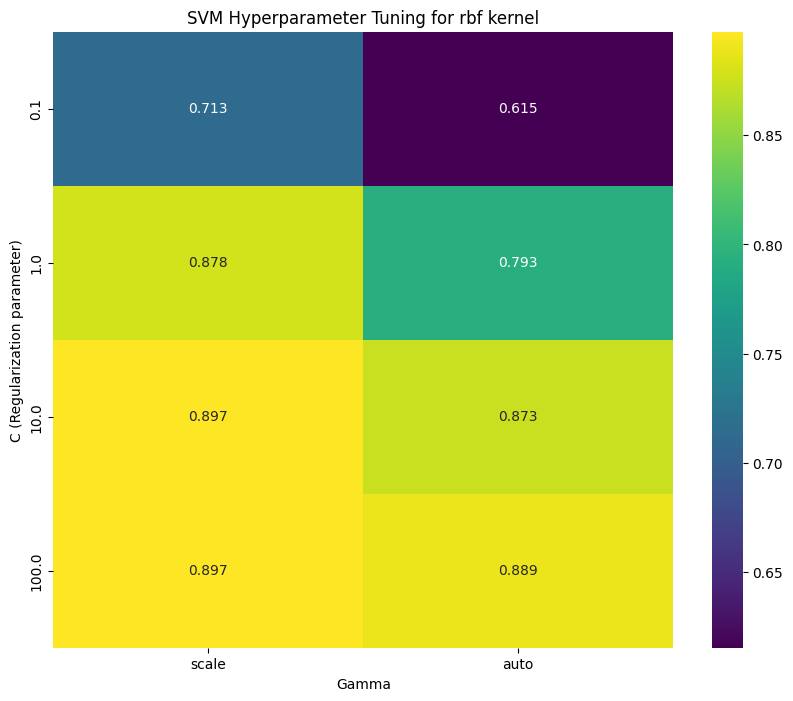

In [9]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly']  # Specifies the kernel type to be used in the algorithm
}

# Choose a kernel type to visualize (e.g., 'rbf')
kernel_type = 'rbf'
kernel_filter = results['param_kernel'] == kernel_type

# Filter the scores for the chosen kernel type
filtered_scores = [score for score, k in zip(results['mean_test_score'], kernel_filter) if k]

# Reshape the filtered scores
scores_matrix = np.array(filtered_scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

# Create a DataFrame for the heatmap
df = pd.DataFrame(scores_matrix, index=param_grid['C'], columns=param_grid['gamma'])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, fmt=".3f", cmap="viridis")
plt.title(f"SVM Hyperparameter Tuning for {kernel_type} kernel")
plt.xlabel("Gamma")
plt.ylabel("C (Regularization parameter)")
plt.show()